# Cleaning and CLustering of Twitter Data Set On Health News

### By

JOSHUA JUNIOR JOHN

JOSEPH TOCHUKWU EZEGWU

AWAL MUHAMMAD UMAR

NIMPA MBOUO RAYAUL

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer as tfi
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances


### Reading in the dataset

In [2]:
path = 'Health-Tweets/'
txt_files = glob.glob(os.path.join(path, "*.txt"))

# loop over the list of txt files
col_names = ["TweetID", "Date_Time", "RawTweet"]
tot_df = pd.DataFrame(columns=col_names)
for f in txt_files:
    df = pd.read_csv(f, sep="|", names=col_names, encoding="mbcs")
    f_name=f.split("\\")[-1]
    f_name=f_name.split(".")[0]
    df['Source']= f_name
    tot_df = pd.concat([tot_df, df], ignore_index=True)

tot_df

,TweetID,Date_Time,RawTweet,Source
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...
63023,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
63024,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
63025,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
63026,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


## Manipulating Columns

In [3]:
#Reformatting the date and time
tot_df["Date_Time"] =  pd.to_datetime(tot_df["Date_Time"])
tot_df['year']=tot_df['Date_Time'].dt.year


# tot_df = tot_df.drop(['Tweet','TunedTweet','Links'], axis=1)
# tot_df

In [4]:
#Extracting links from the raw tweets
tot_df['Links']= tot_df['RawTweet'].apply(lambda x: (','.join(re.findall(r'(https?://\S+)', x))))
tot_df

,TweetID,Date_Time,RawTweet,Source,year,Links
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,2015,http://bbc.in/1CimpJF
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,2015,http://bbc.in/1ChTBRv
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,2015,http://bbc.in/1ChTANp
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,2015,http://bbc.in/1E6jAjt
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,2015,http://bbc.in/1CnLwK7
...,...,...,...,...,...,...
63023,415494259022655489,2013-12-24 14:48:45+00:00,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,2013,http://t.co/ThMd9T…
63024,415493351396233216,2013-12-24 14:45:09+00:00,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,2013,
63025,415493203983204352,2013-12-24 14:44:33+00:00,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,2013,http://on.wsj.com/1cOFtBT
63026,415386956420231169,2013-12-24 07:42:22+00:00,Boston Scientific Eyes China Expansion http://...,wsjhealth,2013,http://on.wsj.com/1kBRC4a


In [5]:
#Extracting hashtags from the raw tweets
tot_df['Hashtags']= tot_df['RawTweet'].apply(lambda x: re.findall('(#\w+)', x.lower()))
tot_df

,TweetID,Date_Time,RawTweet,Source,year,Links,Hashtags
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,2015,http://bbc.in/1CimpJF,[]
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,2015,http://bbc.in/1ChTBRv,[]
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,2015,http://bbc.in/1ChTANp,[]
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,2015,http://bbc.in/1E6jAjt,[]
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,2015,http://bbc.in/1CnLwK7,[]
...,...,...,...,...,...,...,...
63023,415494259022655489,2013-12-24 14:48:45+00:00,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,2013,http://t.co/ThMd9T…,[]
63024,415493351396233216,2013-12-24 14:45:09+00:00,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,2013,,[#aca]
63025,415493203983204352,2013-12-24 14:44:33+00:00,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,2013,http://on.wsj.com/1cOFtBT,[]
63026,415386956420231169,2013-12-24 07:42:22+00:00,Boston Scientific Eyes China Expansion http://...,wsjhealth,2013,http://on.wsj.com/1kBRC4a,[]


In [6]:
#Extracting user-mentions from the raw tweets
tot_df['UserMention']= tot_df['RawTweet'].apply(lambda x: re.findall('(@[A-Za-z0-9]+)', x))
tot_df

,TweetID,Date_Time,RawTweet,Source,year,Links,Hashtags,UserMention
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,2015,http://bbc.in/1CimpJF,[],[]
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,2015,http://bbc.in/1ChTBRv,[],[]
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,2015,http://bbc.in/1ChTANp,[],[]
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,2015,http://bbc.in/1E6jAjt,[],[]
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,2015,http://bbc.in/1CnLwK7,[],[]
...,...,...,...,...,...,...,...,...
63023,415494259022655489,2013-12-24 14:48:45+00:00,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,2013,http://t.co/ThMd9T…,[],[@stefaniei]
63024,415493351396233216,2013-12-24 14:45:09+00:00,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,2013,,[#aca],"[@timothywmartin, @cdweaver]"
63025,415493203983204352,2013-12-24 14:44:33+00:00,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,2013,http://on.wsj.com/1cOFtBT,[],"[@stefaniei, @cdweaver, @timothywmartin]"
63026,415386956420231169,2013-12-24 07:42:22+00:00,Boston Scientific Eyes China Expansion http://...,wsjhealth,2013,http://on.wsj.com/1kBRC4a,[],[]


## Cleaning the Data

In [7]:
# Remove all links
tot_df['Tweet']= tot_df['RawTweet'].apply(lambda x: re.sub(r'(https?://\S+)','', x).strip())

# Remove all hash tags
tot_df['Tweet']= tot_df['Tweet'].apply(lambda x: re.sub(r'(#\w+)','', x.lower()).strip())

# Remove all user-mentions
tot_df['Tweet']= tot_df['Tweet'].apply(lambda x: re.sub(r'(@[A-Za-z0-9]+)','', x.lower()).strip())


### Tokenization, Stemming and Lemmantization, Punctuation and Stopwords Removal

In [8]:
nltk.download('wordnet')
wlem = WordNetLemmatizer()
stemmer = PorterStemmer()
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt','say', 'may','get','http','link'])
print(STOPWORDS)

def tokenizer_nd_stopwords(text):
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    tokens =  [wlem.lemmatize(stemmer.stem(w)) for w in text.split()]
    tokens_sw = [w for w in tokens if w not  in STOPWORDS]
#     return tokens
    return' '.join(tokens_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JOSHUA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
tot_df['TunedTweet']= tot_df['Tweet'].apply(lambda s: tokenizer_nd_stopwords(s))
tot_df

,TweetID,Date_Time,RawTweet,Source,year,Links,Hashtags,UserMention,Tweet,TunedTweet
0,585978391360221184,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,2015,http://bbc.in/1CimpJF,[],[],breast cancer risk test devised,breast cancer risk test devi
1,585947808772960257,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,2015,http://bbc.in/1ChTBRv,[],[],gp workload harming care - bma poll,gp workload harm care bma poll
2,585947807816650752,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,2015,http://bbc.in/1ChTANp,[],[],short people's 'heart risk greater',short peopl heart risk greater
3,585866060991078401,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,2015,http://bbc.in/1E6jAjt,[],[],new approach against hiv 'promising',new approach hiv promis
4,585794106170839041,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,2015,http://bbc.in/1CnLwK7,[],[],coalition 'undermined nhs' - doctors,coalit undermin nh doctor
...,...,...,...,...,...,...,...,...,...,...
63023,415494259022655489,2013-12-24 14:48:45+00:00,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,2013,http://t.co/ThMd9T…,[],[@stefaniei],rt : addiction and the brain: scientists explo...,addict brain scientist explor stress respons m...
63024,415493351396233216,2013-12-24 14:45:09+00:00,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,2013,,[#aca],"[@timothywmartin, @cdweaver]",rt : ho-ho-hold up! a surprise gift for health...,hohohold surpris gift health insur monday wa o...
63025,415493203983204352,2013-12-24 14:44:33+00:00,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,2013,http://on.wsj.com/1cOFtBT,[],"[@stefaniei, @cdweaver, @timothywmartin]",rt : health-insurance deadline extended in lat...,healthinsur deadlin extend late push boost number
63026,415386956420231169,2013-12-24 07:42:22+00:00,Boston Scientific Eyes China Expansion http://...,wsjhealth,2013,http://on.wsj.com/1kBRC4a,[],[],boston scientific eyes china expansion,boston scientif eye china expans


# Data Exploratory Phase

## Hashtags Analysis

In [10]:
#Group Hashtags by source
hash_groups = pd.DataFrame(tot_df.groupby(['Source'])['Hashtags'].sum())
type(hash_groups.loc['KaiserHealthNews'])
hash_groups.transpose().columns

Index(['KaiserHealthNews', 'NBChealth', 'bbchealth', 'cbchealth', 'cnnhealth',
       'everydayhealth', 'foxnewshealth', 'gdnhealthcare', 'goodhealth',
       'latimeshealth', 'msnhealthnews', 'nprhealth', 'nytimeshealth',
       'reuters_health', 'usnewshealth', 'wsjhealth'],
      dtype='object', name='Source')

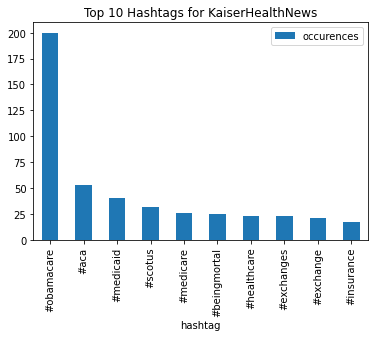

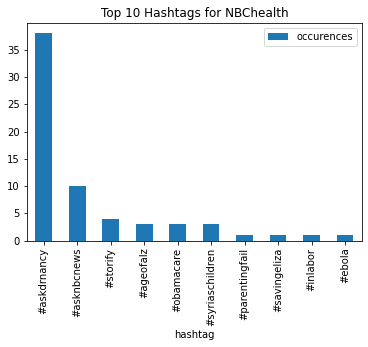

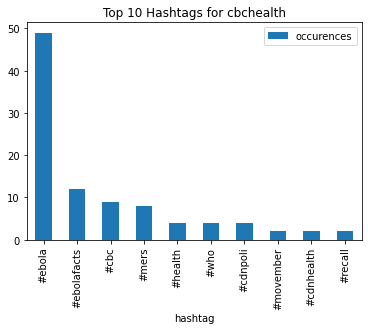

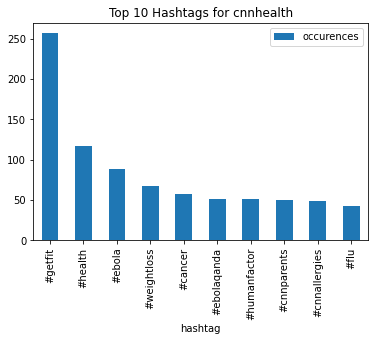

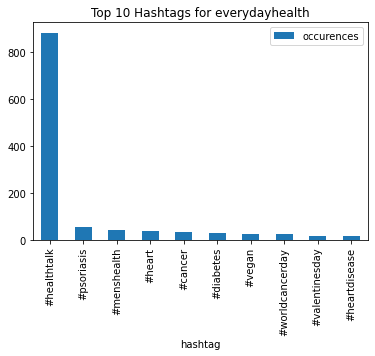

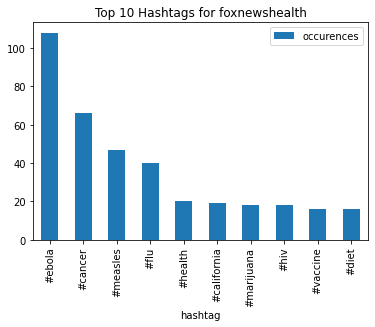

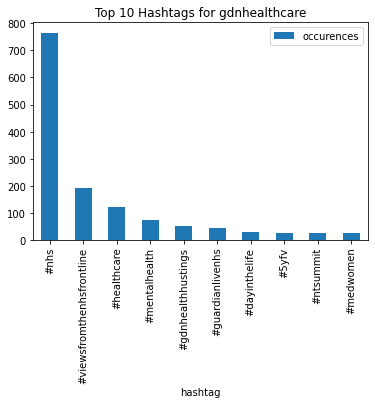

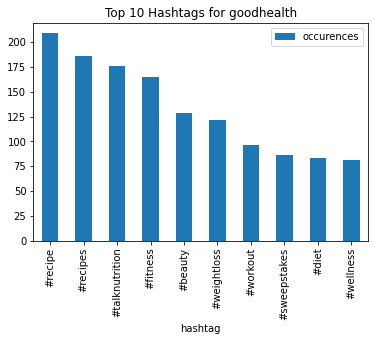

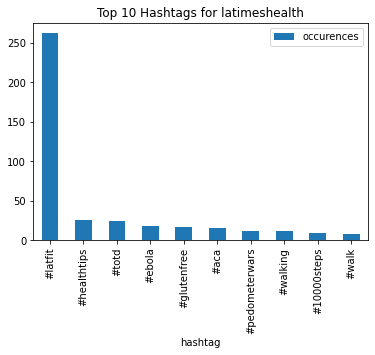

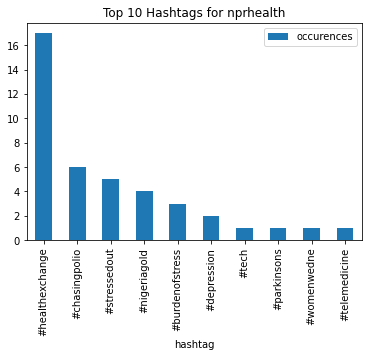

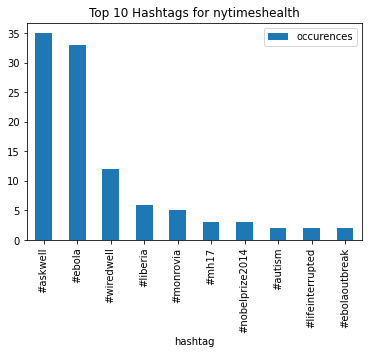

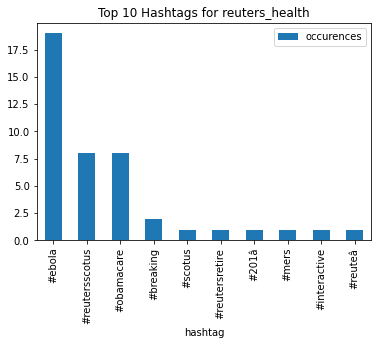

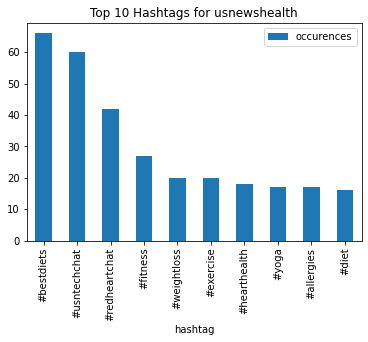

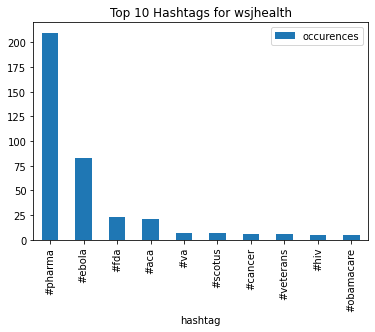

In [11]:
for source in hash_groups.index:
#     print(source)
    hashtags = hash_groups.loc[source].apply(lambda x: pd.value_counts(x)).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
    hashtags.columns = ['hashtag','occurences']
    if not hashtags.empty:
        hashtags[:10].plot(kind='bar', x='hashtag', title='Top 10 Hashtags for ' + source)

,hashtag,occurences
1119,#healthtalk,883.0
1686,#nhs,766.0
748,#ebola,417.0
1749,#obamacare,265.0
1389,#latfit,262.0
984,#getfit,261.0
2597,#weightloss,236.0
1099,#health,231.0
888,#fitness,211.0
1864,#pharma,210.0


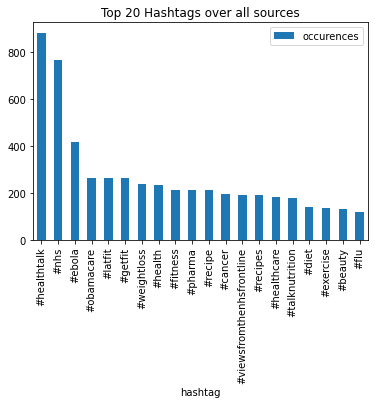

In [12]:
Allhashtags = tot_df['Hashtags'].apply(lambda x: pd.value_counts(x)).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
Allhashtags.columns = ['hashtag','occurences']
Allhashtags.head()
Allhashtags[:20].plot(kind='bar', x='hashtag', title='Top 20 Hashtags over all sources')
Allhashtags[:20]

### Trending Hashtags Plot by Year

In [13]:
date_data= tot_df.groupby(['year'])['Hashtags'].sum().apply(lambda x : ', '.join(x))
date_data = pd.DataFrame(date_data)
date_data

,Hashtags
year,
2011,"#recipeoftheday, #recipeoftheday, #merrychrist..."
2012,"#science, #health, #allergies, #food, #humanfa..."
2013,"#cnntop10, #cnntop10, #cnntop10, #cnntop10, #c..."
2014,"#ebola, #ebola, #peterpanlive, #mentalhealth, ..."
2015,"#mers, #naturalhealth, #essentialoils, #health..."


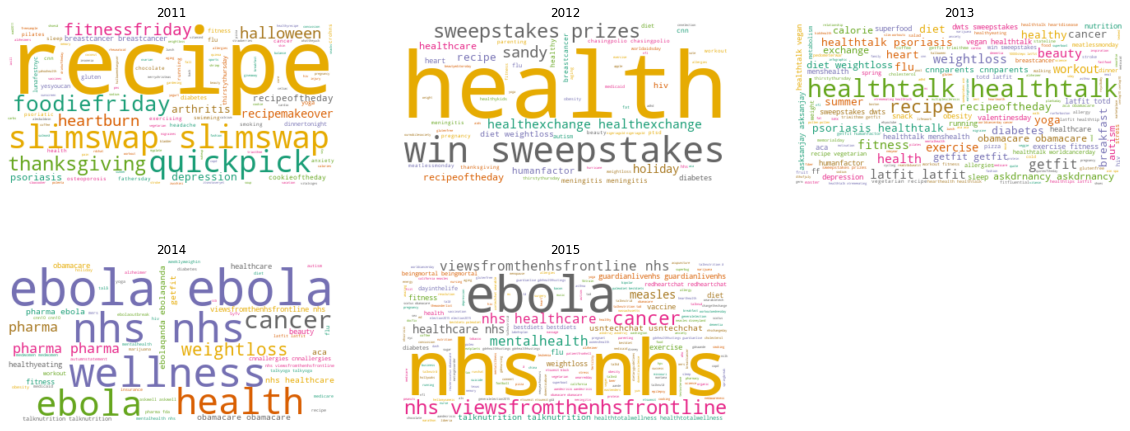

In [14]:
# Visualization with wordcloud
wc = WordCloud(
    max_words=200,
    stopwords='english',
    random_state=42,
    background_color='white',
    max_font_size=150,
    colormap="Dark2",
    )

plt.rcParams['figure.figsize'] = [20,8]

title=list(date_data.index)

# Create subplots for each channel
for index, year in enumerate(date_data.index):
    wc.generate(date_data.Hashtags[year])
    
    plt.subplot(2, 3, index+1)
    plt.imshow(wc, interpolation= 'bilinear')
    plt.axis("off")
    plt.title(title[index])

## User Mention Analysis

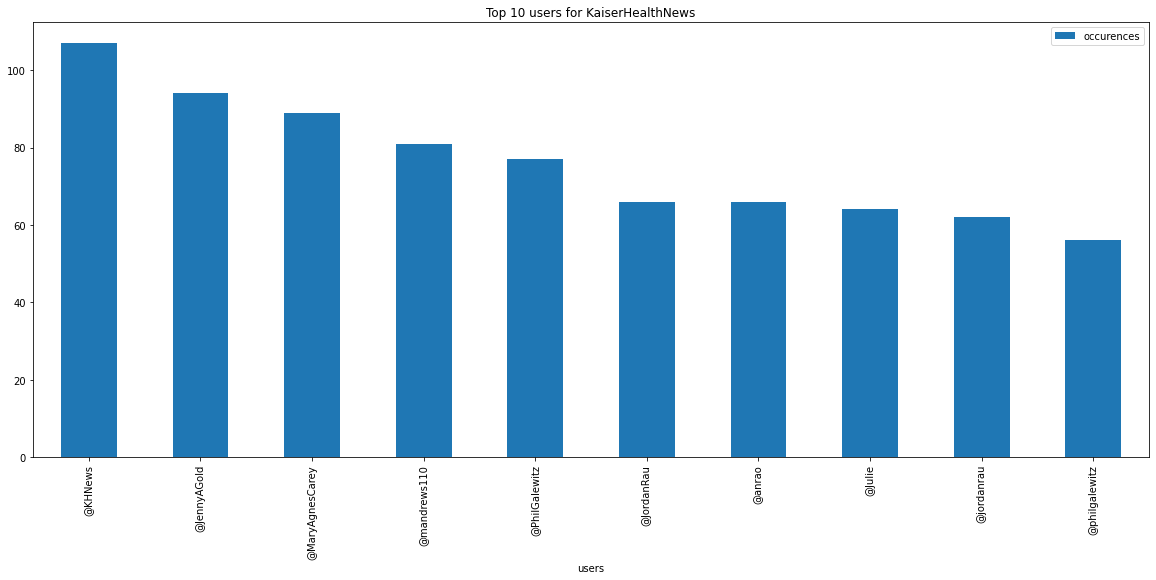

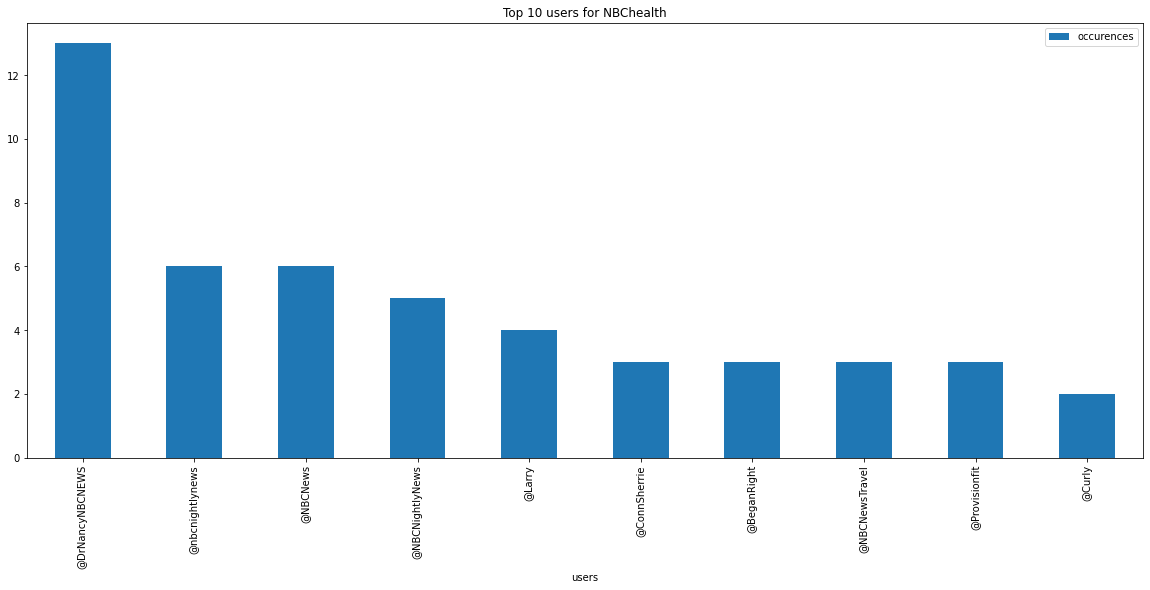

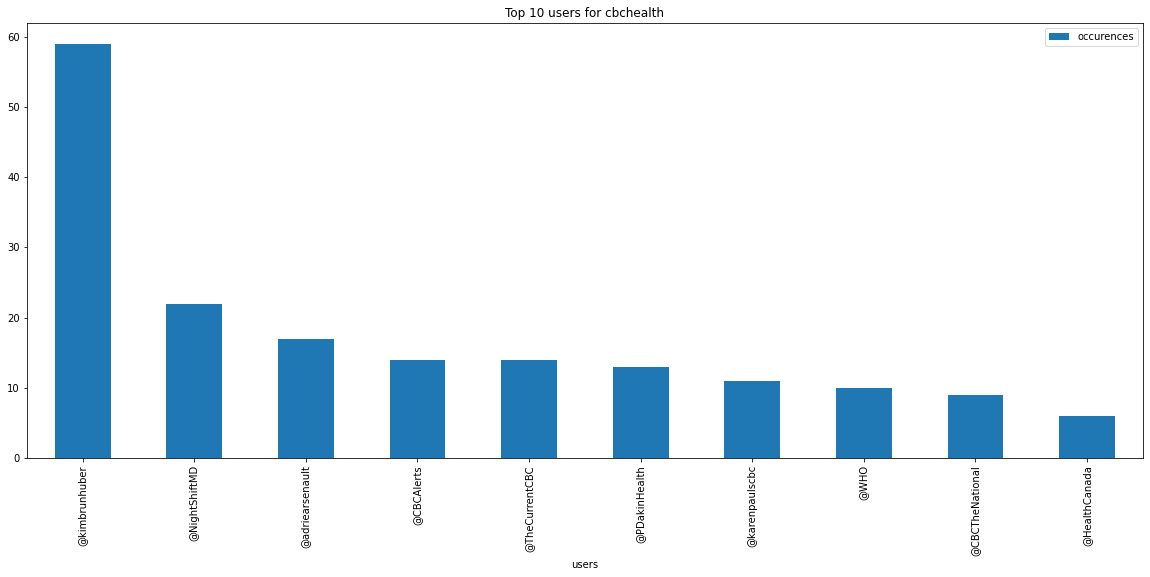

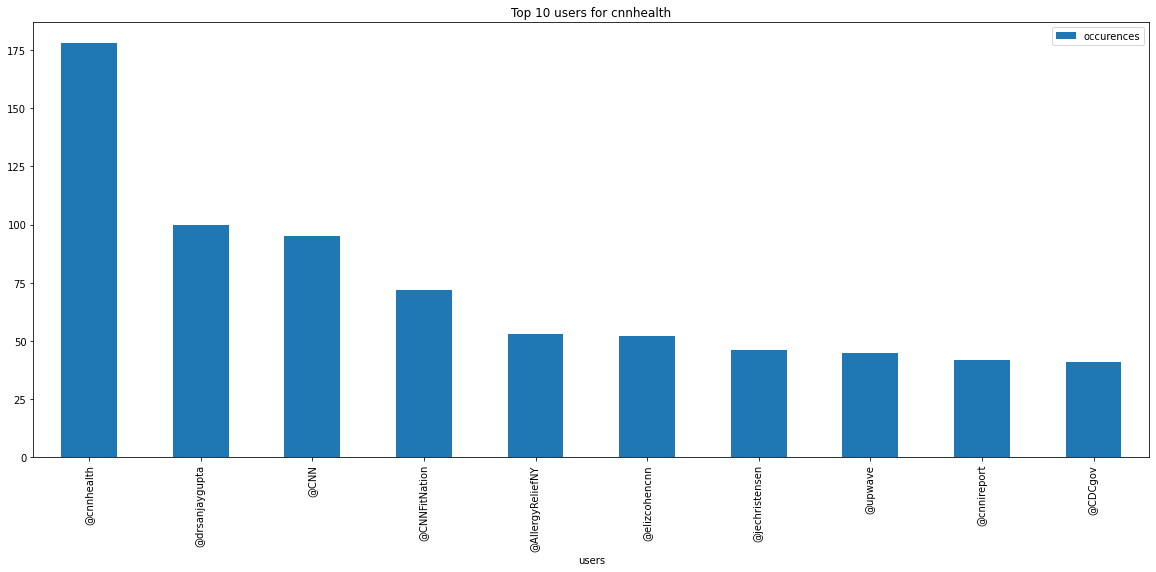

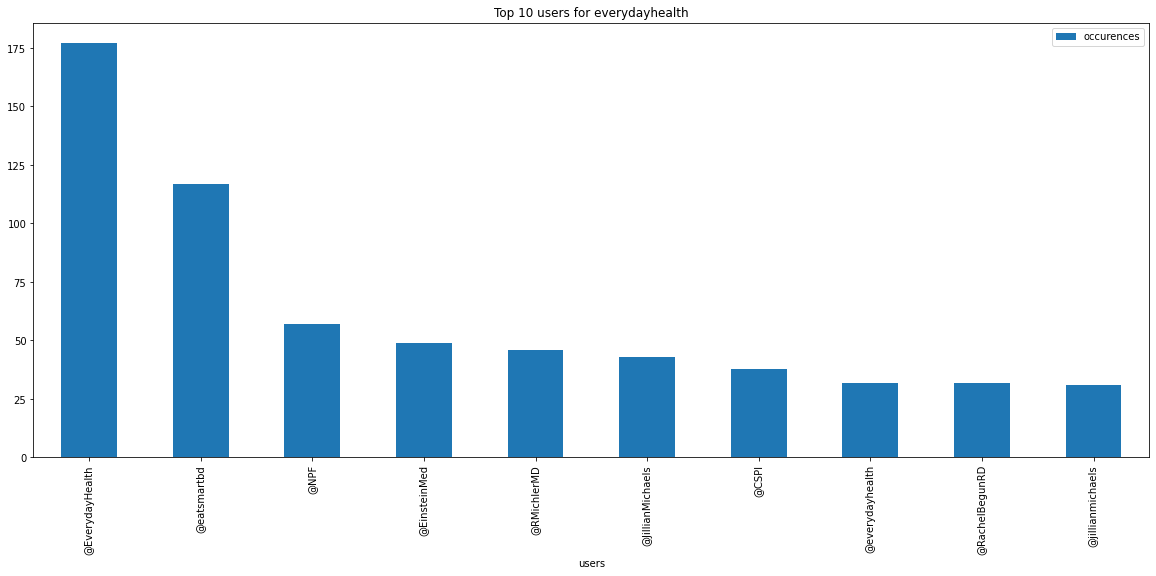

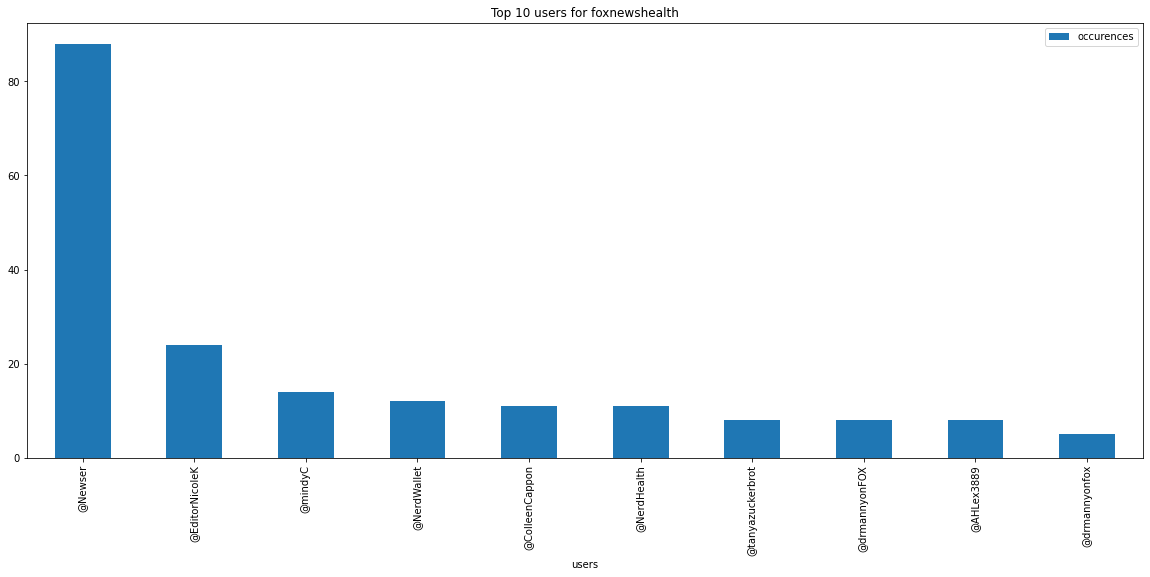

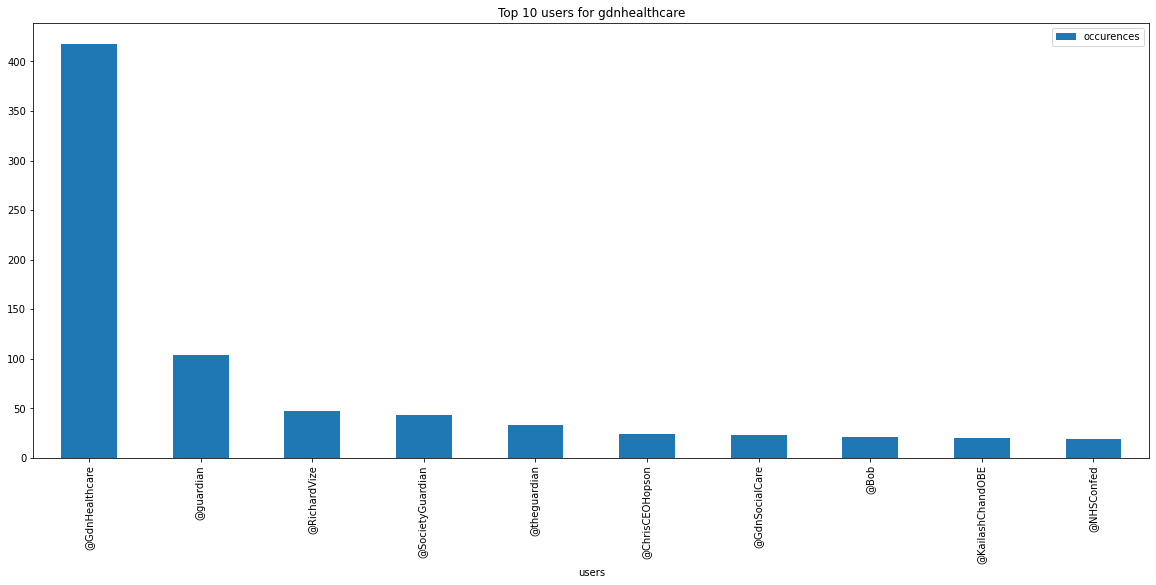

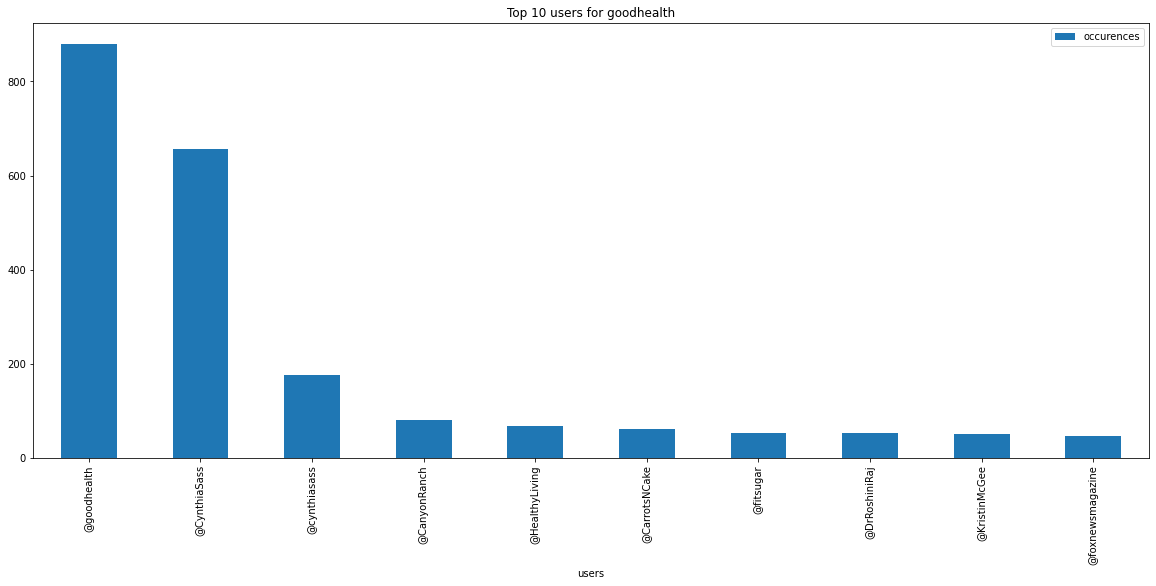

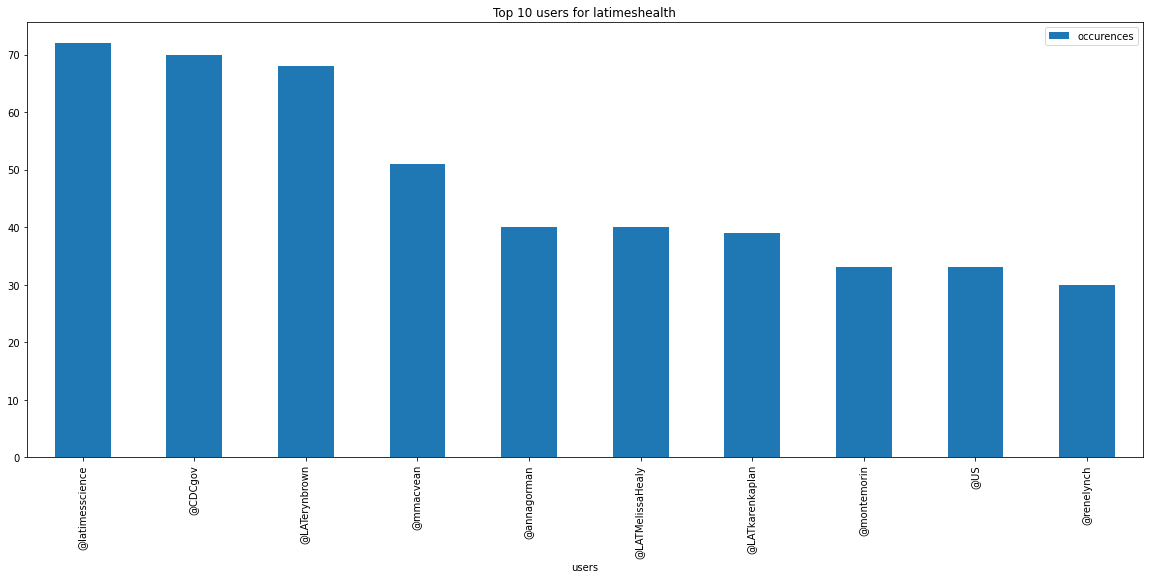

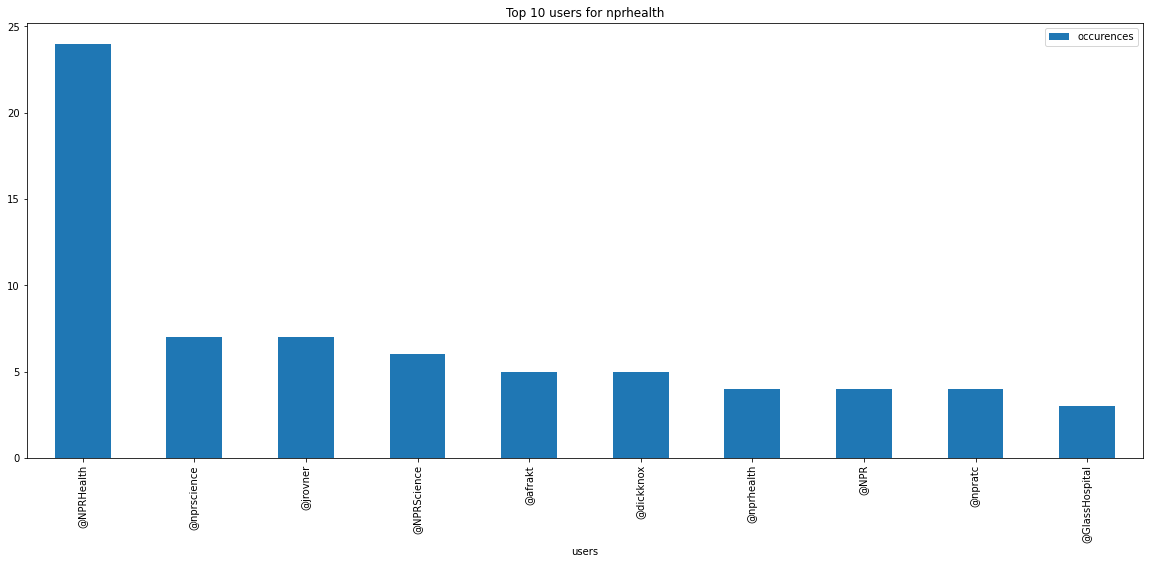

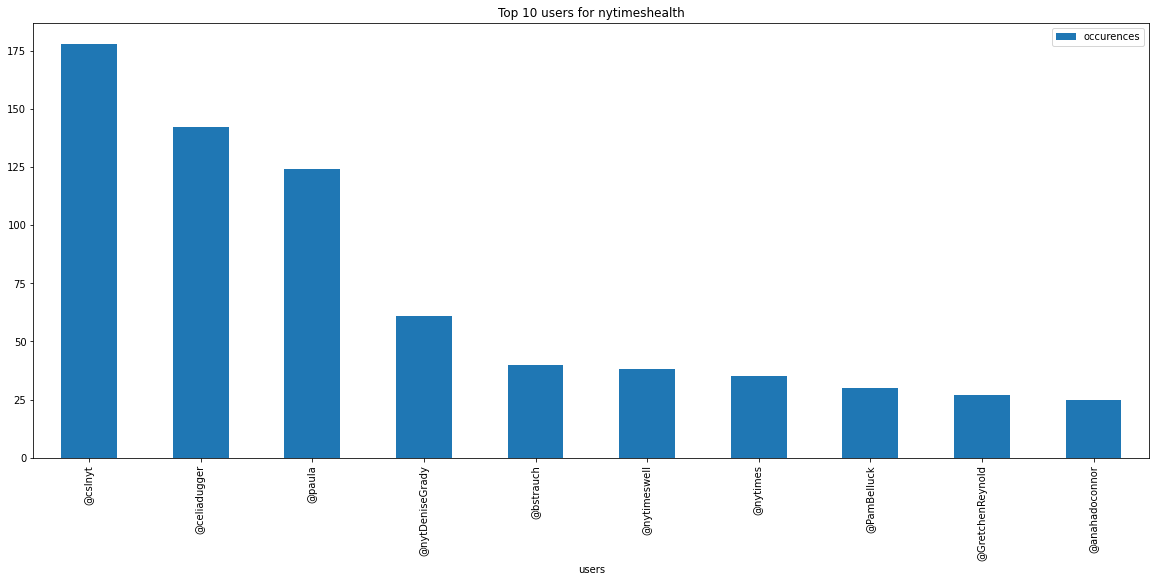

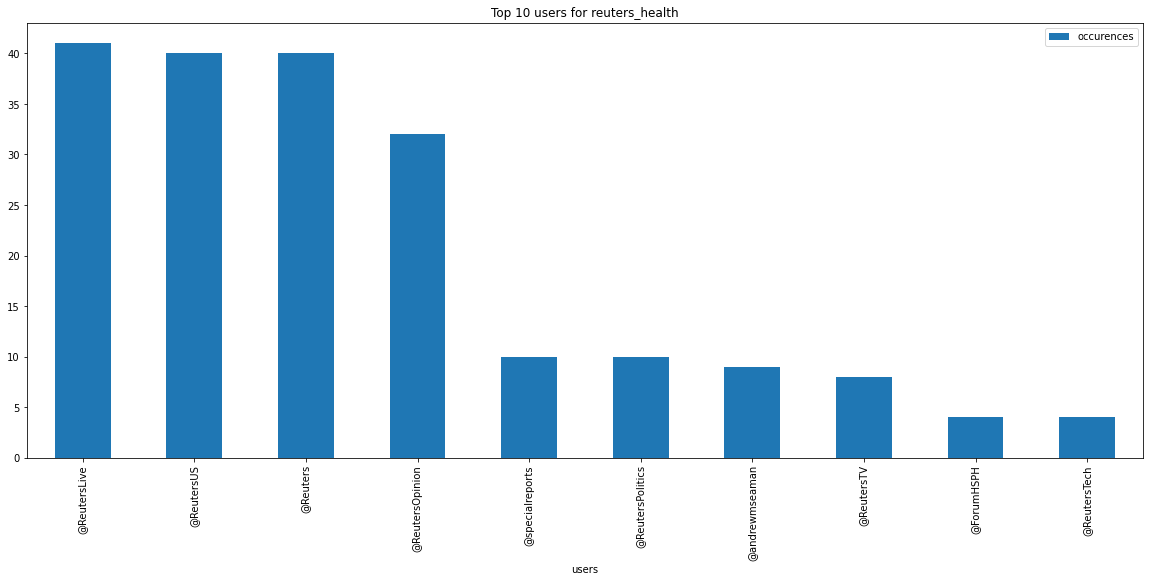

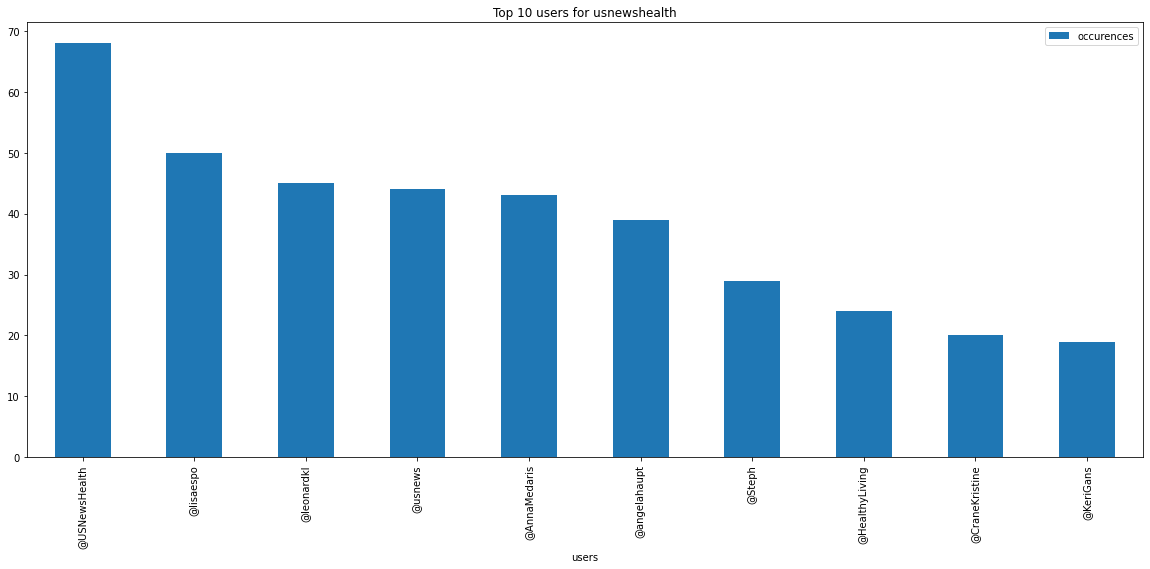

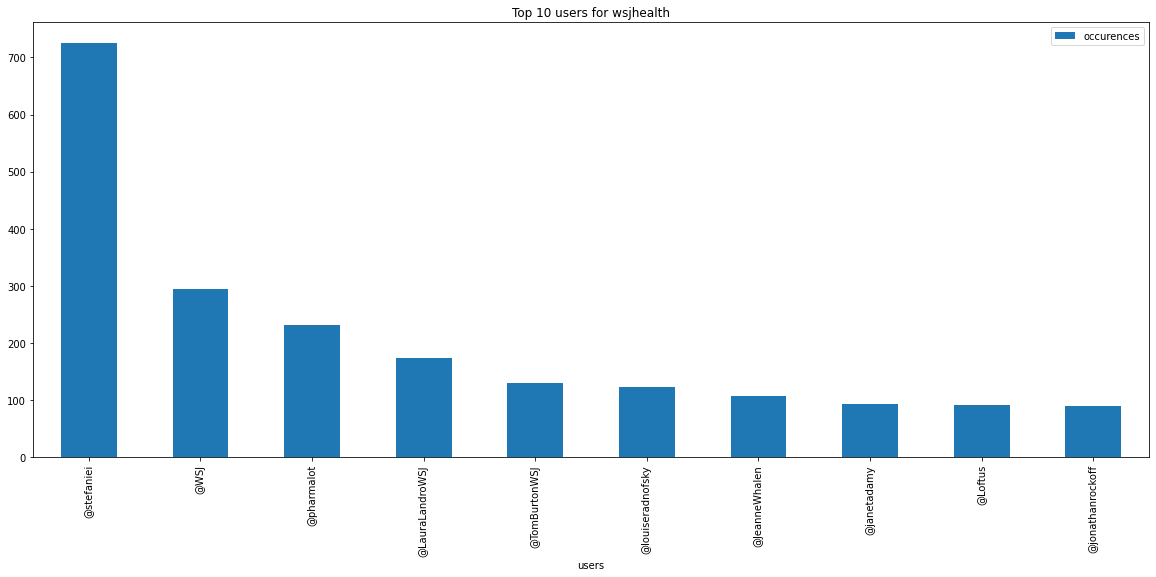

In [15]:
#Group UserMention by source
user_groups = pd.DataFrame(tot_df.groupby(['Source'])['UserMention'].sum())
type(user_groups.loc['KaiserHealthNews'])

for source in user_groups.index:
    users = user_groups.loc[source].apply(lambda x: pd.value_counts(x)).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
    users.columns = ['users','occurences']
    if not users.empty:
        users[:10].plot(kind='bar', x='users', title='Top 10 users for ' + source)

,users,occurences
3138,@goodhealth,894.0
4200,@stefaniei,725.0
486,@CynthiaSass,656.0
864,@GdnHealthcare,418.0
2347,@WSJ,299.0


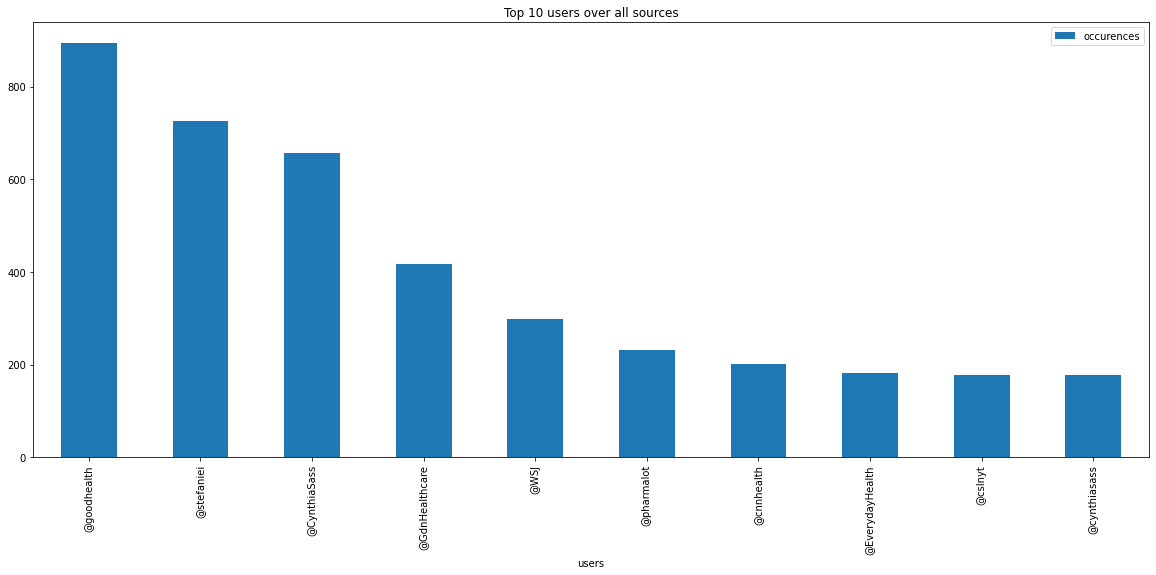

In [16]:
AllUsers = tot_df['UserMention'].apply(lambda x: pd.value_counts(x)).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
AllUsers.columns = ['users','occurences']
AllUsers[:10].plot(kind='bar', x='users', title='Top 10 users over all sources')
AllUsers.head()

### Word Occurence

                                                         TunedTweet
Source                                                             
KaiserHealthNews  tougher vaccin law calif clear first hurdlnew ...
NBChealth         ebola exposur cdc worker remain wellpregnant w...
bbchealth         breast cancer risk test devigp workload harm c...
cbchealth         drug need care monitor expiri date pharmacists...
cnnhealth         abund onlin info turn u ehypochondriac wors le...
everydayhealth    make 11 percent u10 snack help lose weight bur...
foxnewshealth     injuri prevent program unpopular high school c...
gdnhealthcare     member network sign freepalli care like india ...
goodhealth        itâ€™ hard littl cardio home ha awesom plyomet...
latimeshealth     five new run shoe aim go extra milegym rat dis...
msnhealthnews     heavi coffe intak affect fertil treatment stud...
nprhealth         would like health insur stock stuffernew blood...
nytimeshealth     risk use social medium spot si

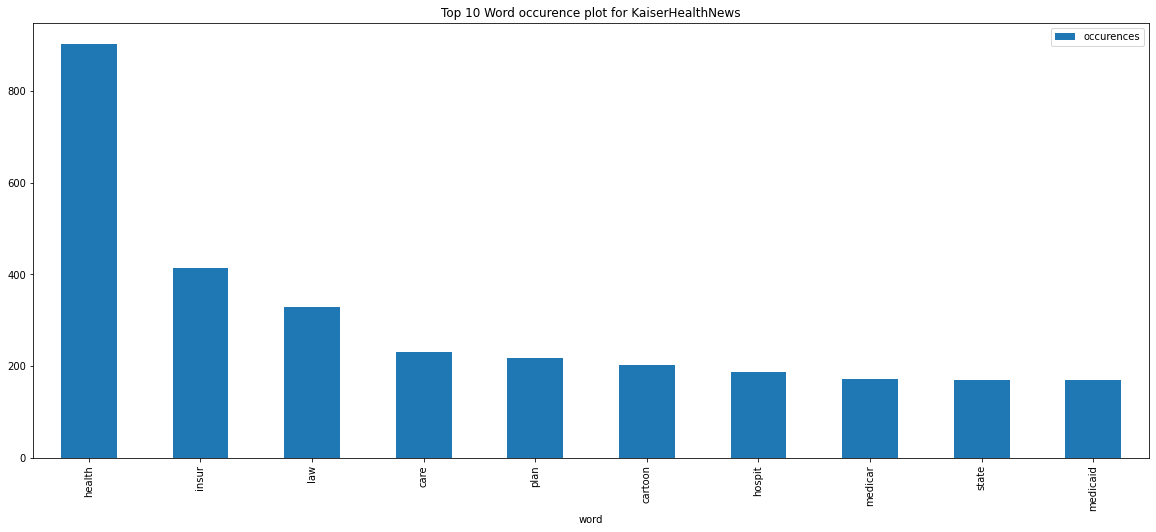

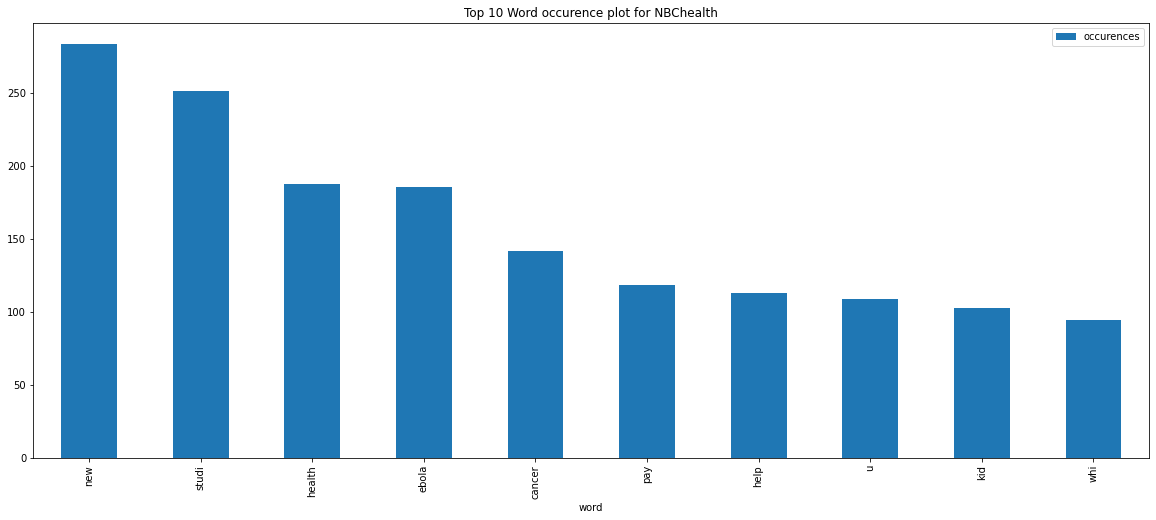

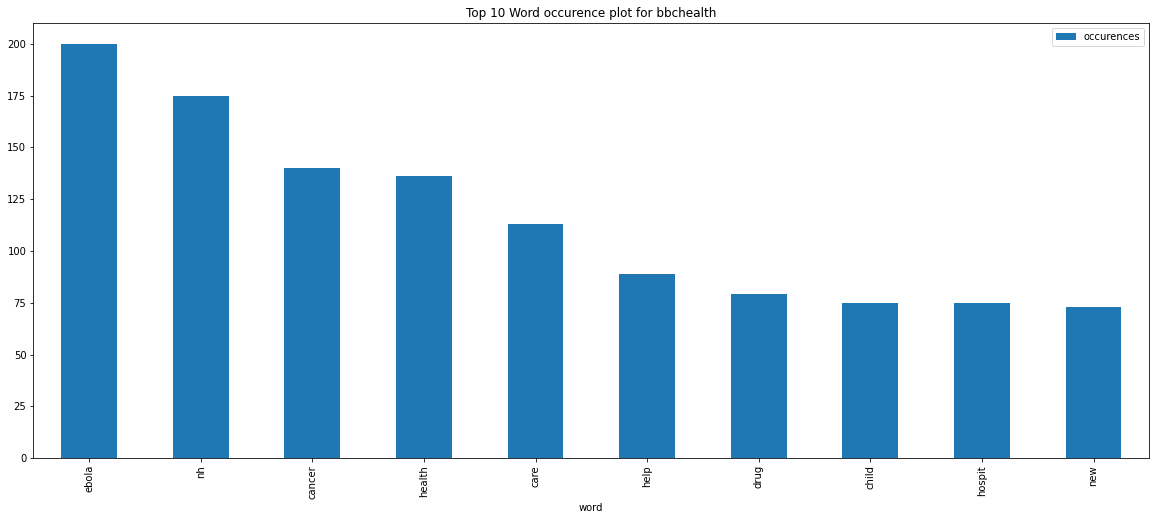

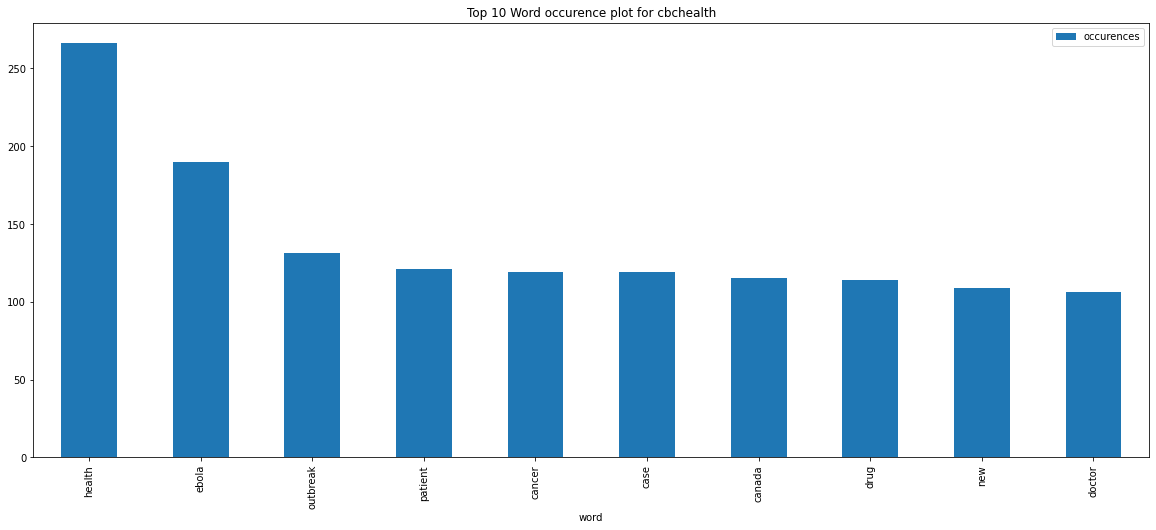

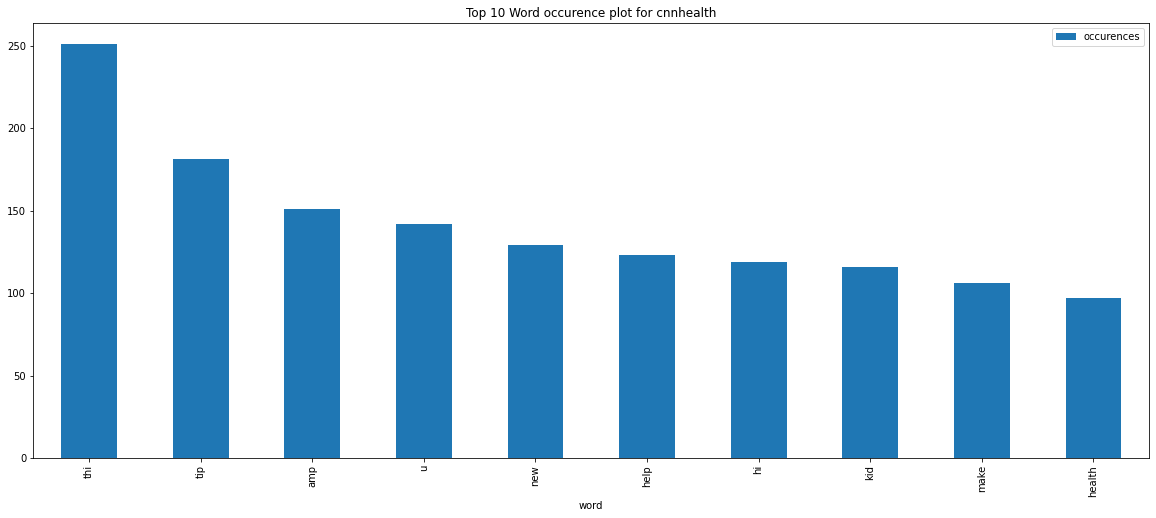

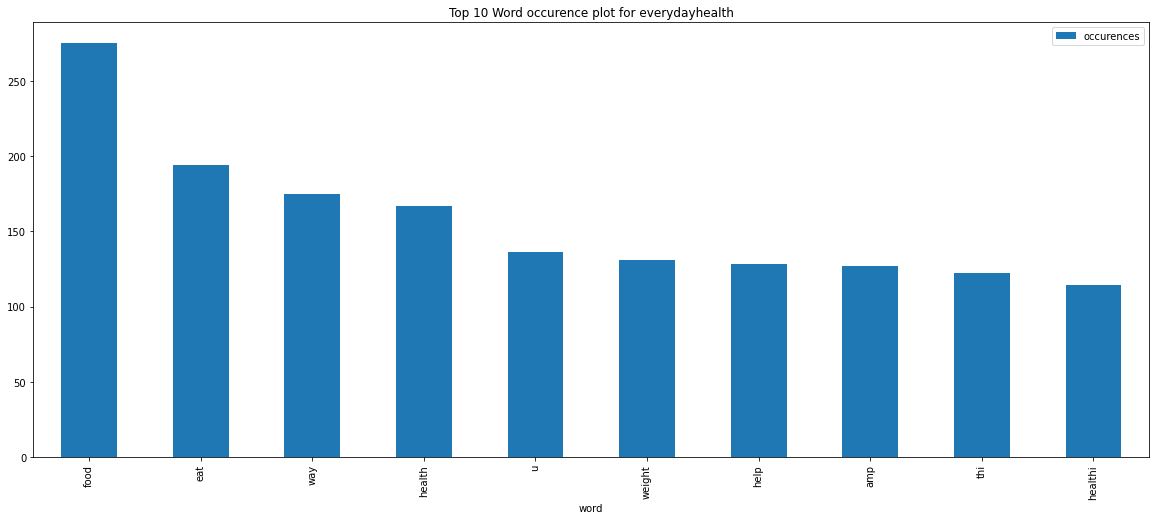

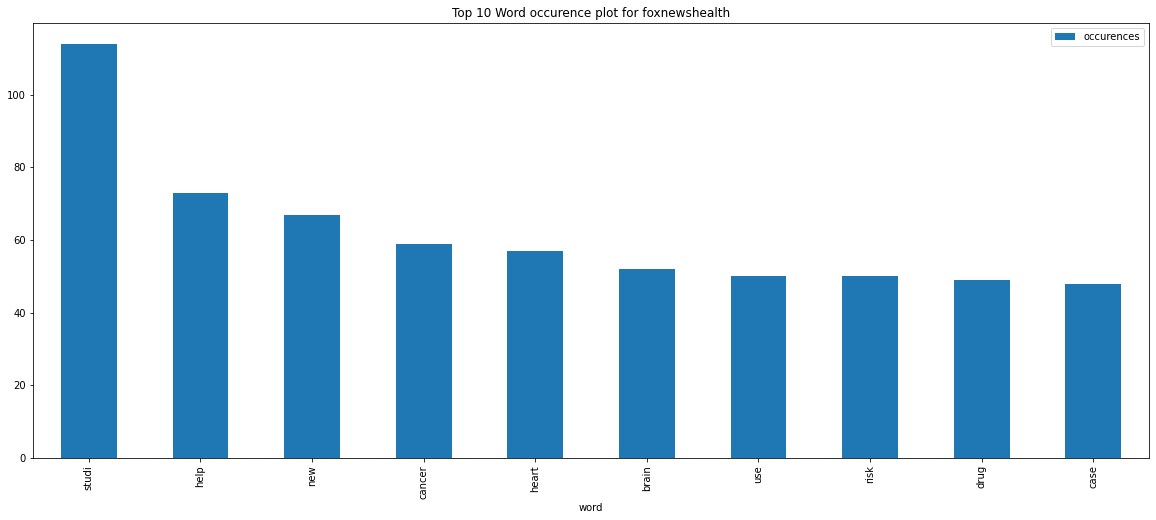

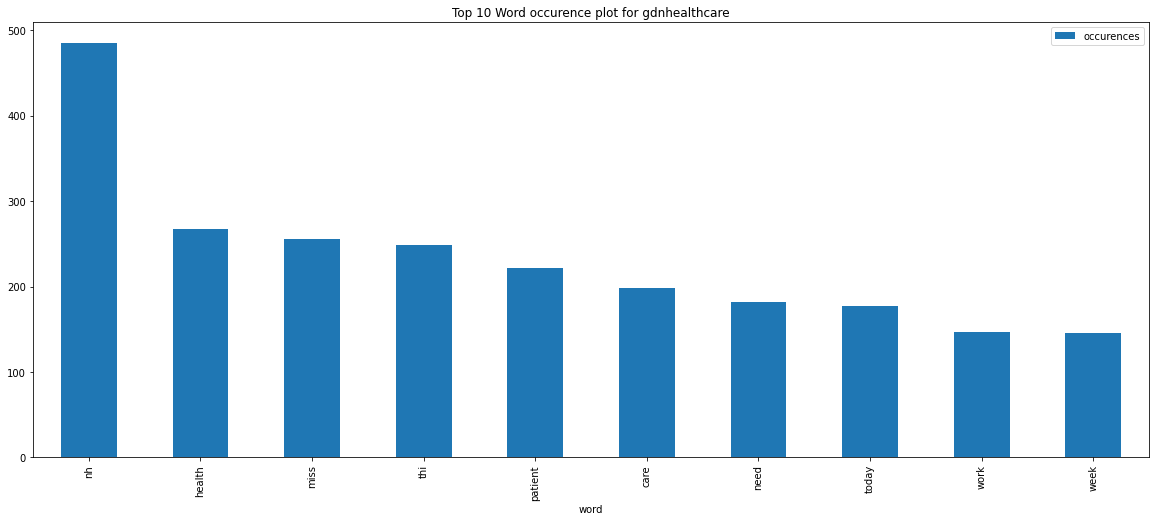

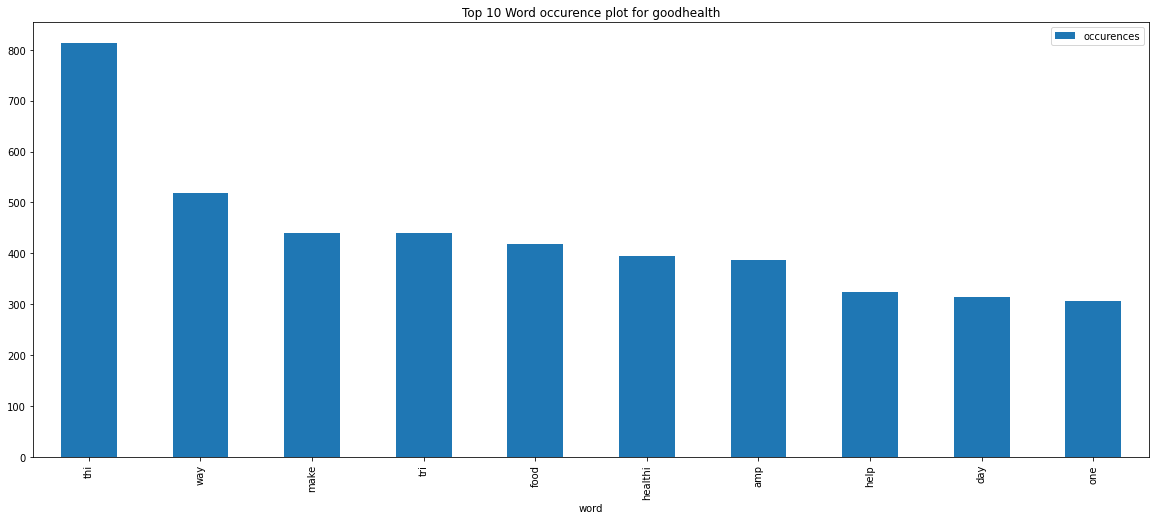

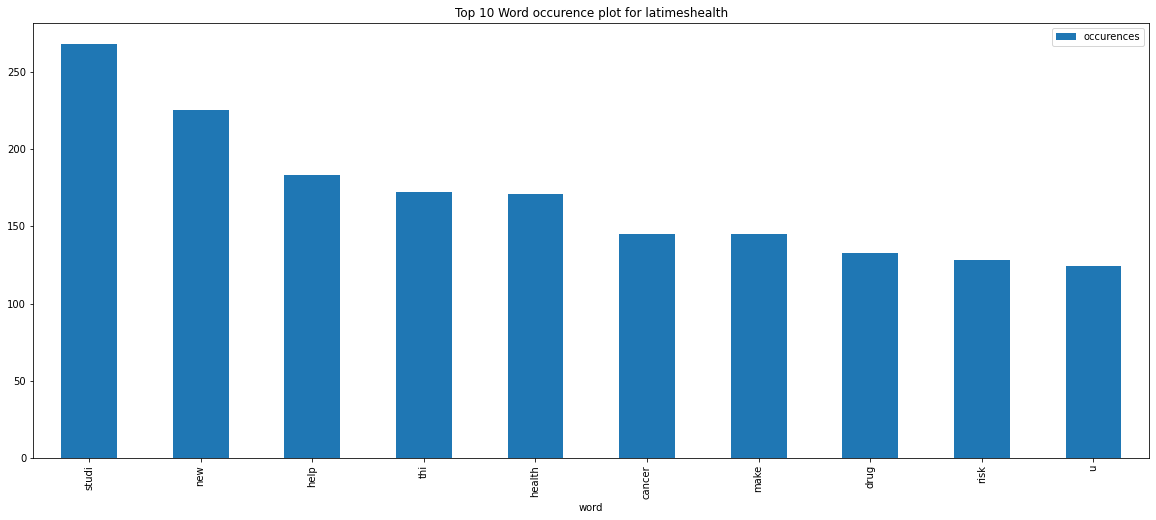

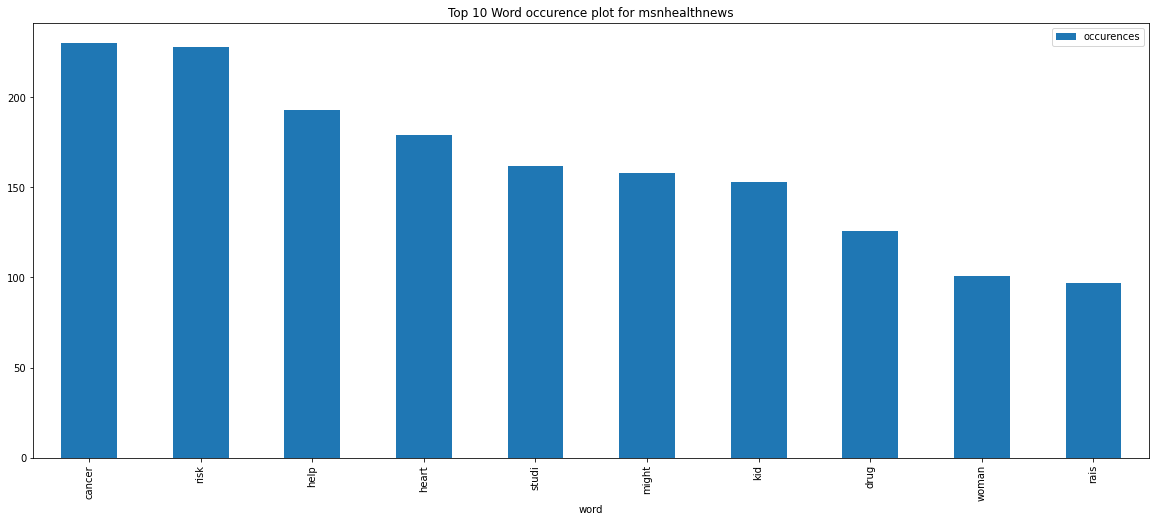

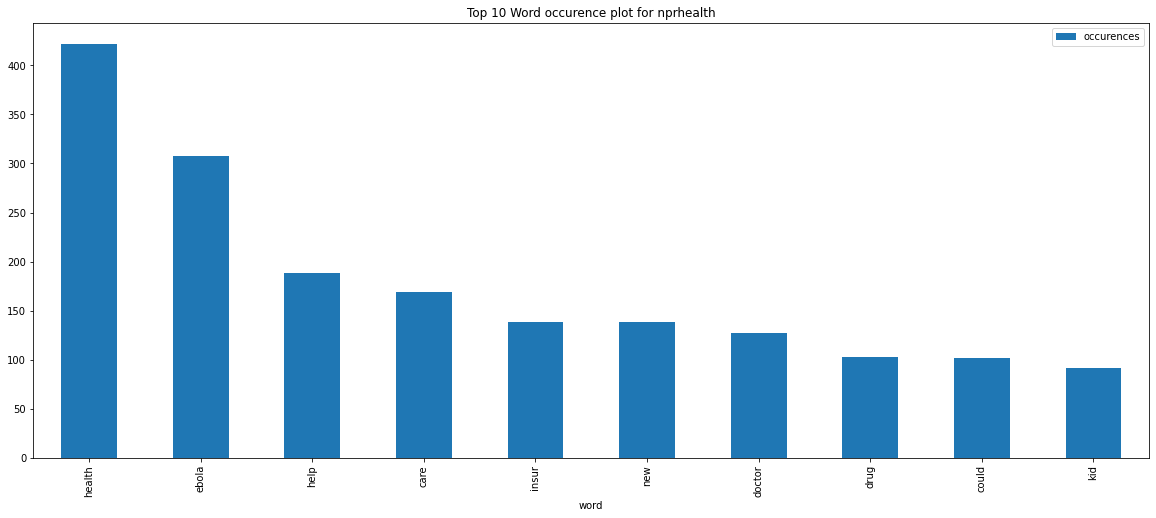

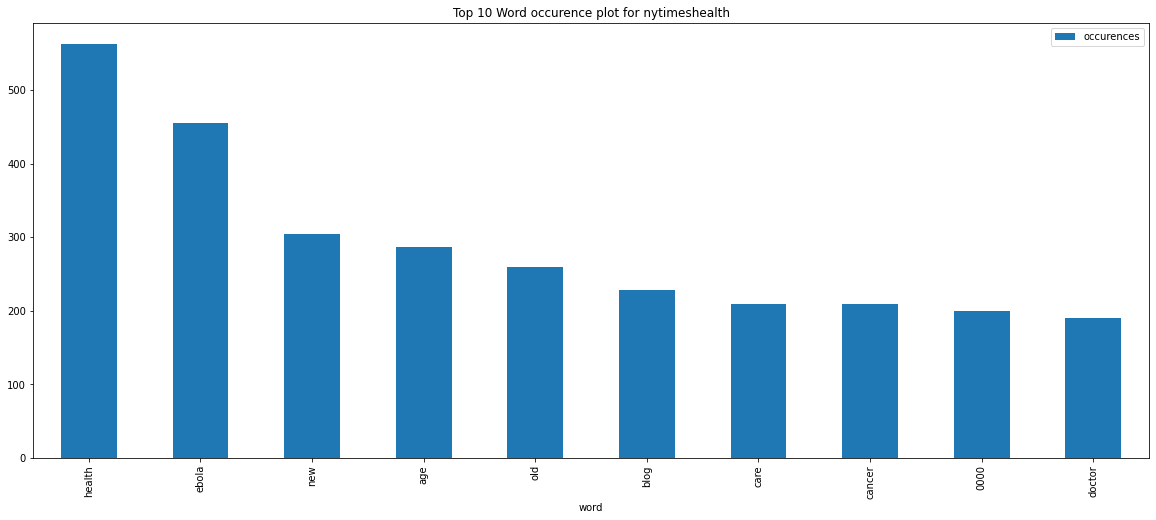

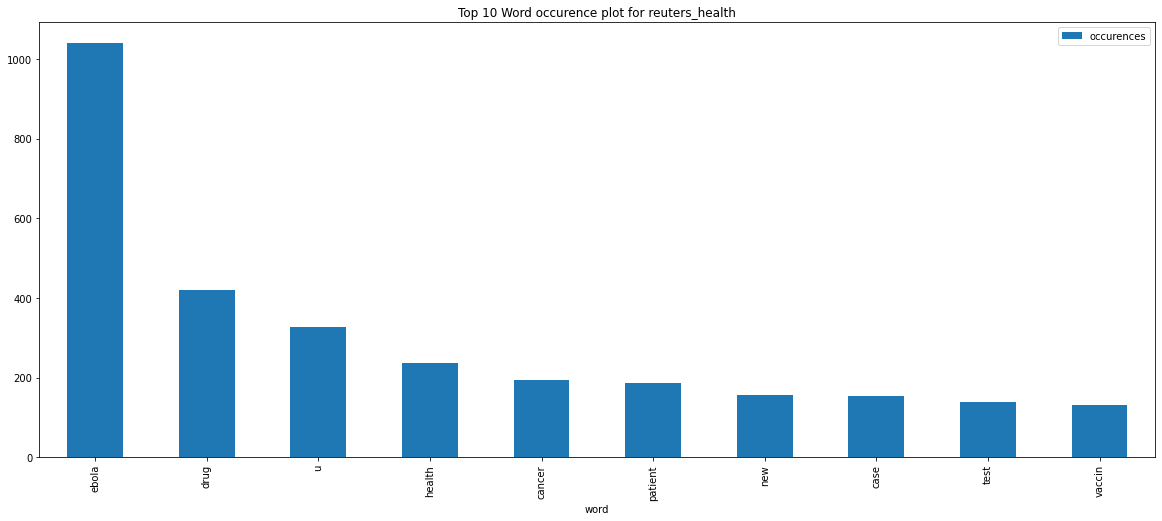

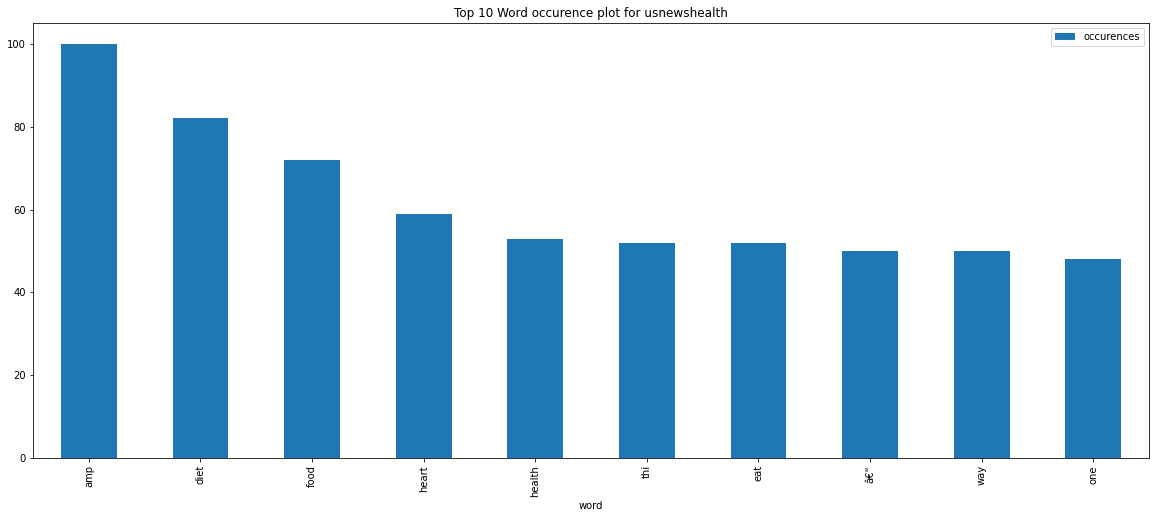

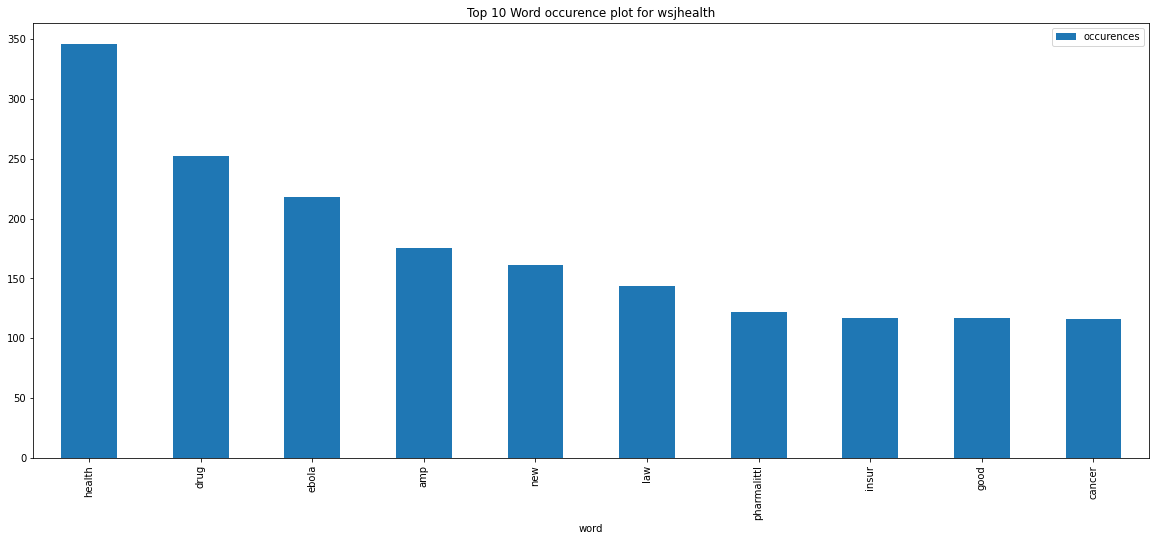

In [17]:
#Words occurence for each sources
groups = pd.DataFrame(tot_df.groupby(['Source'])['TunedTweet'].sum())
print(groups)



for source in groups.index:
    words = groups.loc[source].dropna()\
                            .apply(lambda y: pd.value_counts(y.split()))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
    words.columns = ['word','occurences']
    words[:10].plot(kind='bar',x = 'word', title='Top 10 Word occurence plot for '+source)


## Visualization with wordcloud

### Most tweeted words by Year

In [18]:
date_tweets= tot_df.groupby(['year'])['TunedTweet'].sum()
date_tweets = pd.DataFrame(date_tweets)
date_tweets

,TunedTweet
year,
2011,wheat watchglutenfre beer realli safe celiac p...
2012,babi boomer nun help revolution health carehop...
2013,pair charg â£1m nh fraudsurgeri cancel due aam...
2014,experiment drug uk ebola nursebola screen test...
2015,breast cancer risk test devigp workload harm c...


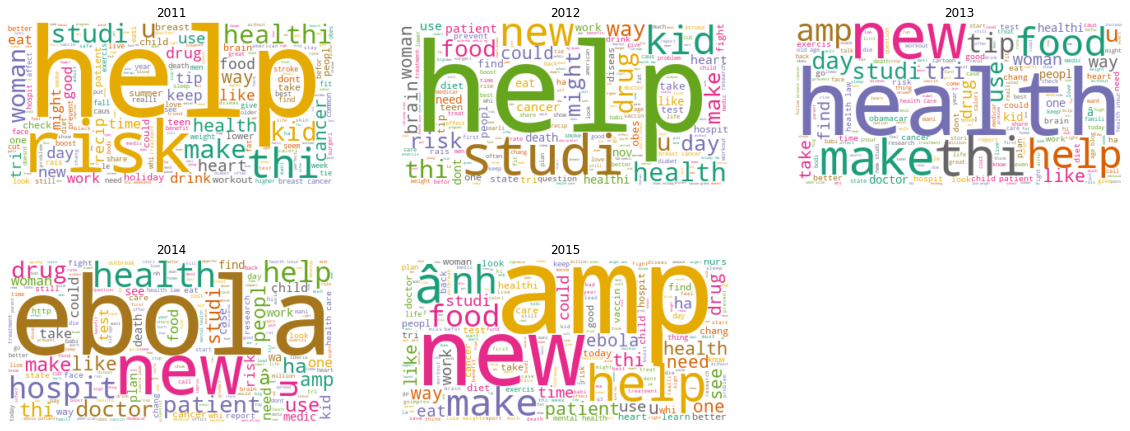

In [19]:
wc = WordCloud(
    stopwords='english',
    random_state=42,
    background_color='white',
    max_font_size=150,
    colormap="Dark2")

plt.rcParams['figure.figsize'] = [20,8]

title=list(date_tweets.index)

# Create subplots for each channel
for index, year in enumerate(date_tweets.index):
    wc.generate(date_tweets.TunedTweet[year])
    plt.subplot(2, 3, index+1)
    plt.imshow(wc, interpolation= 'bilinear')
    plt.axis("off")
    plt.title(title[index])

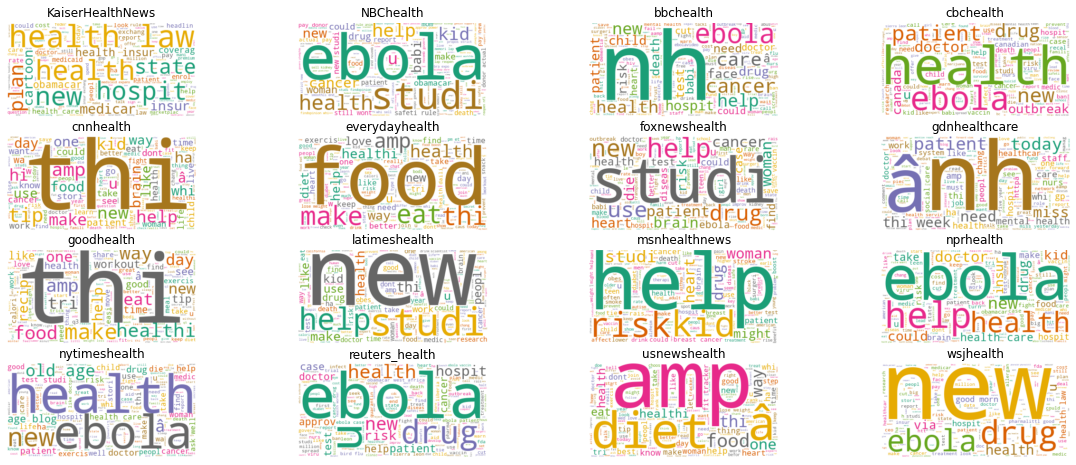

In [20]:
# Visualization with wordcloud
wc = WordCloud(
    stopwords=STOPWORDS,
    random_state=42,
    background_color='white',
    max_font_size=200,
    colormap="Dark2",
    )


plt.rcParams['figure.figsize'] = [20,8]

title=list(groups.index)

# Create subplots for each channel
for index, source in enumerate(groups.index):
    wordString = groups.loc[source].TunedTweet
    wc.generate(wordString)
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation= 'bilinear')
    plt.axis("off")
    plt.title(title[index])



### Most Tweeted Words

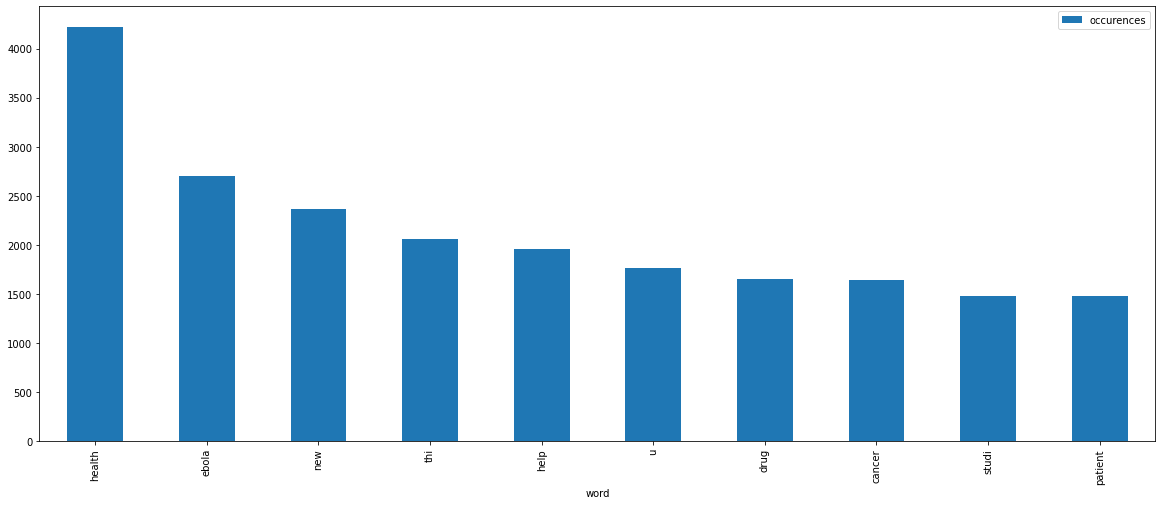

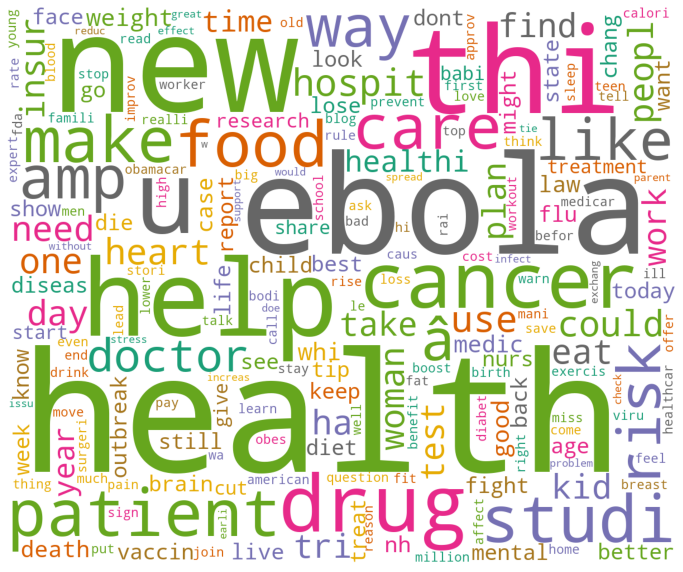

In [21]:
words = groups['TunedTweet'].dropna()\
                            .apply(lambda y: pd.value_counts(y.split()))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']
words[:10].plot(kind='bar',x = 'word')
words.head()



all_tweets = groups['TunedTweet'].apply(lambda x: ''.join(x)).str.cat(sep=' ')
plt.figure(figsize=(12,12))

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      colormap="Dark2",
                      collocations=False,
                      width=1200,
                      height=1000
                     ).generate(all_tweets)
plt.axis('off')
plt.imshow(wordcloud)

In [22]:
# test = ' '.join(groups.index)

# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='white',
#                       colormap="Dark2",
#                       collocations=False,
#                       width=1200,
#                       height=1000
#                      ).generate(test)
# plt.axis('off')
# plt.imshow(wordcloud)

## Bigrams: Two most common words

In [23]:
from nltk import bigrams

all_tweets_list = all_tweets.split()
bigramseries = (pd.Series(nltk.ngrams(all_tweets_list, 2)).value_counts())
bigramseries[:10]


(health, care)      429
(health, law)       399
(health, insur)     303
(mental, health)    286
(breast, cancer)    275
(old, age)          248
(age, blog)         221
(lose, weight)      213
(ebola, patient)    201
(weight, loss)      189
dtype: int64

<AxesSubplot:>

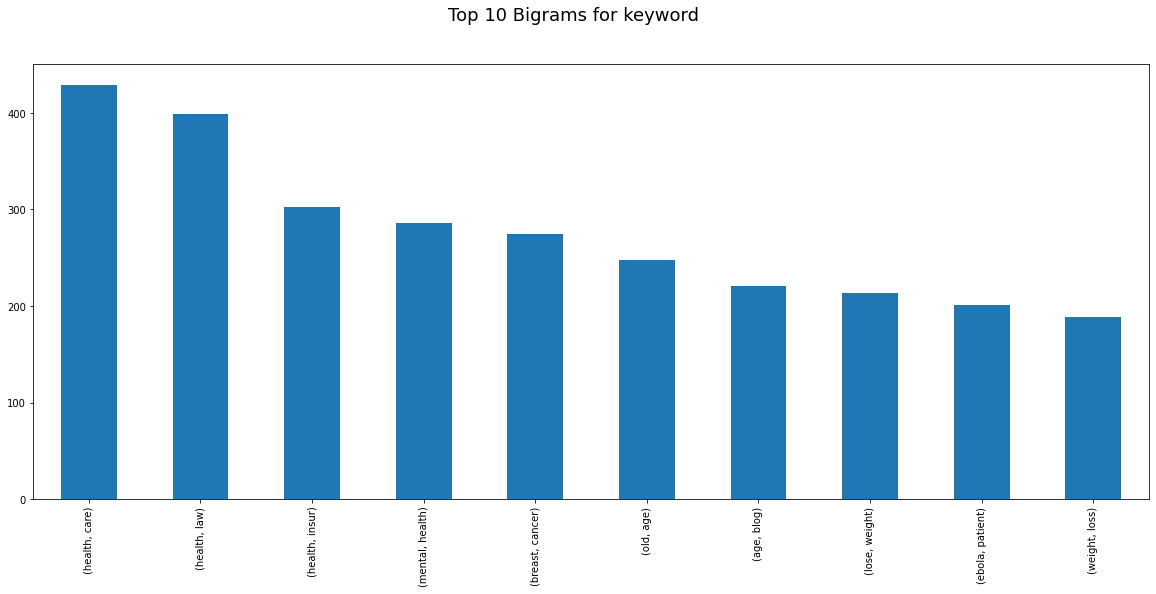

In [24]:
# bigramseries.plot(kind='bar')
plt.suptitle('Top 10 Bigrams for keyword', fontsize=18)
bigramseries[:10].plot(kind='bar')

# Unsupervised Learning: Data Clustering

## Term Frequency-Inverse Document Frequency (TF-IDF)

In [25]:
tot_df['TunedTweet']

0                             breast cancer risk test devi
1                           gp workload harm care bma poll
2                           short peopl heart risk greater
3                                  new approach hiv promis
4                                coalit undermin nh doctor
                               ...                        
63023    addict brain scientist explor stress respons m...
63024    hohohold surpris gift health insur monday wa o...
63025    healthinsur deadlin extend late push boost number
63026                     boston scientif eye china expans
63027                 desper famili india ray hope alabama
Name: TunedTweet, Length: 63028, dtype: object

In [26]:
n=100
print(' ')
print(f"The {n} most occuring words in tweet")
tf_idf_vect = tfi(stop_words = STOPWORDS, max_features = n)

x = tot_df['TunedTweet']

tf_idf = tf_idf_vect.fit_transform(x)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

vector = pd.DataFrame(tf_idf_array,
                     columns = tf_idf_vect.get_feature_names())
vector

 
The 100 most occuring words in tweet


,10,age,amp,babi,back,best,better,brain,cancer,care,...,want,warn,way,week,weight,well,whi,woman,work,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.53854,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594697,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
vector.describe()

,10,age,amp,babi,back,best,better,brain,cancer,care,...,want,warn,way,week,weight,well,whi,woman,work,year
count,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,...,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000,63028.000000
mean,0.008305,0.008222,0.012683,0.008373,0.007508,0.007366,0.007678,0.009921,0.021888,0.016760,...,0.008257,0.006975,0.012779,0.006529,0.009087,0.017245,0.015720,0.014064,0.012030,0.010214
std,0.076215,0.077669,0.093055,0.080176,0.074780,0.072546,0.072271,0.086218,0.121540,0.104566,...,0.074638,0.073892,0.092869,0.067147,0.076933,0.114974,0.103508,0.100248,0.091392,0.081141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## K-Means Clustering

KMeans(max_iter=600, n_clusters=2)
[-3283.900668619738, -1816.9517410047179, -514.5656805879537, -378.4509082782611, -254.21105041059025, -200.15789964394077]


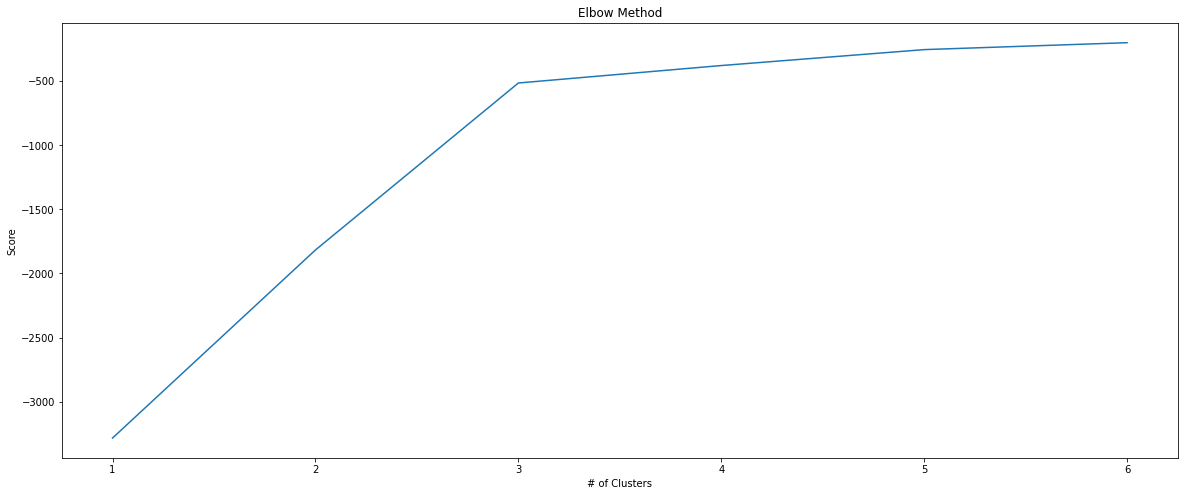

In [28]:
#Convert to 2 feature using PCA
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)


#find out ideal number of clusters using Elbow Method
num_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in num_clusters]
print(kmeans[1])

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
print(score)

plt.plot(num_clusters, score)
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()


### Silhoutte Score

---------------------------------------
KMeans(max_iter=600, n_clusters=3)
Silhouette score: 0.8682402725784029
---------------------------------------
KMeans(max_iter=600, n_clusters=5)
Silhouette score: 0.8695681437046352


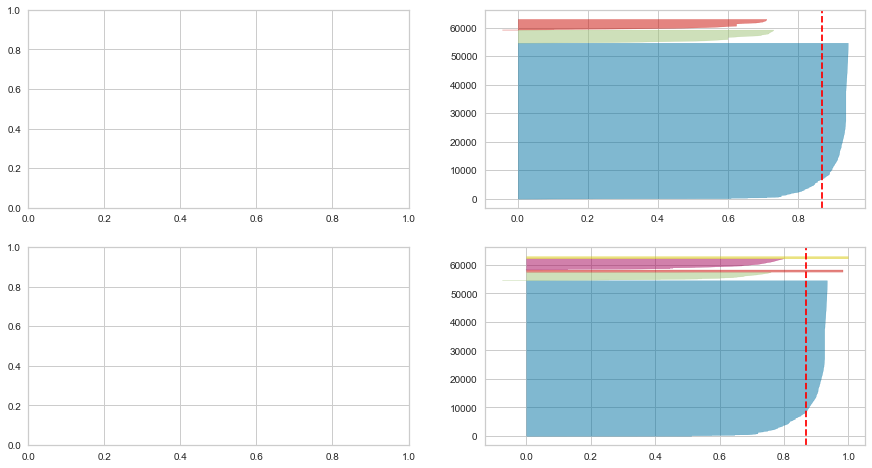

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [3,5]:
    n = i-1
    print("---------------------------------------")
    print(kmeans[n])
    print("Silhouette score:",silhouette_score(Y_sklearn, kmeans[n].predict(Y_sklearn)))
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans[n], colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Y_sklearn)
    

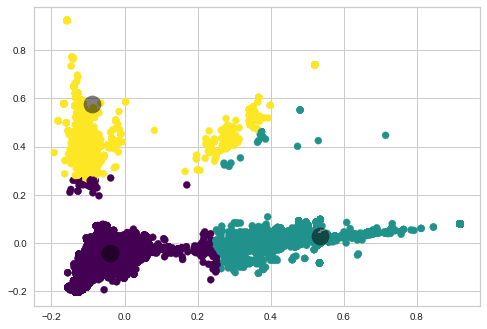

In [33]:
true_k = 3
kmeans = KMeans(n_clusters=true_k, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

skcenters = fitted.cluster_centers_

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(skcenters[:, 0], skcenters[:, 1], c='black', s=300, alpha=0.5)

In [34]:
# function that identifies the features with the highest mean tf_idf 
# scores across each cluster
def get_top_feats_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        feats = tf_idf_vect.get_feature_names()
        best_feats = [(feats[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_feats, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

dfs = get_top_feats_cluster(tf_idf_array, prediction, 15)

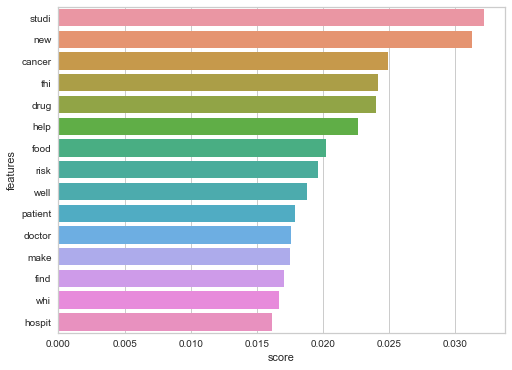

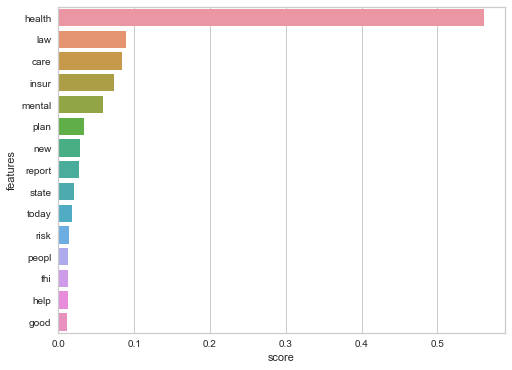

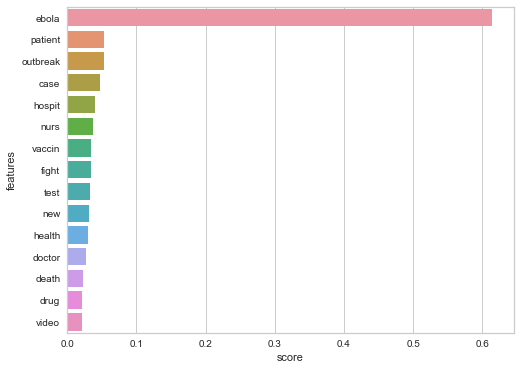

In [35]:
for i in range(true_k):
    plt.figure(figsize=(8,6))
    sns.barplot(x='score', y='features',data=dfs[i][:15]);

<ipython-input-36-0dffb0e87166>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  yticks = ax.set_yticklabels(df.features)


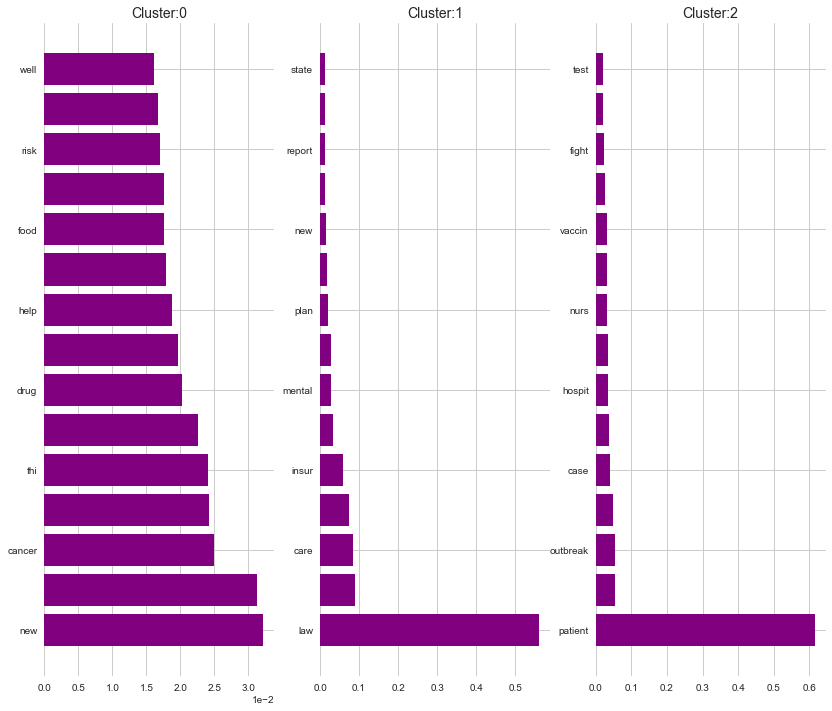

In [36]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title('Cluster:' + str(i), fontsize=14)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='purple')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)